# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 9.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

Идейно надо транспонирование применить к первой скобке, перемножить скобку на скобку и взять дифференциал по w от четырех слагаемых. Одно из них уйдет, так как не зависит от w, а остальные три хитро преобразуются и получается ответ:  
  
$ \nabla_w Q(w)  = 2X^T(-y+Xw)^T$  
  
выводить это было больно..

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

Все изменения в descents.py

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: [туть](https://contest.yandex.ru/contest/41257/run-report/73413619/)  



* **StochasticDescent**: [туть](https://contest.yandex.ru/contest/41257/run-report/73198621/)  



* **MomentumDescent**: [туть](https://contest.yandex.ru/contest/41257/run-report/73201043/)  



* **Adam**: [адам](https://contest.yandex.ru/contest/41257/run-report/73203672/)  



* **LinearRegression**: [тутъ](https://contest.yandex.ru/contest/41257/run-report/73333093/)

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
# sns.set(style='darkgrid', palette='rocket')
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 12

In [7]:
data = pd.read_csv('autos.csv')

За датасет с автомобилями отдельный респект❤️

In [8]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
data.shape

(241190, 10)

Данных не так много

In [10]:
data.isnull().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

Пустых значений нет, это хорошо

In [14]:
data.describe()

powerPS      kilometer  autoAgeMonths          price
count  241190.000000  241190.000000  241190.000000  241190.000000
mean      131.271628  123766.677723     144.768676    6887.741892
std        60.622613   39825.955933      73.092598    8024.451993
min        51.000000    5000.000000       1.000000       1.000000
25%        90.000000  100000.000000      92.000000    1750.000000
50%       120.000000  150000.000000     140.000000    4100.000000
75%       160.000000  150000.000000     192.000000    8999.000000
max       589.000000  150000.000000     600.000000   99999.000000

Есть аномально большая и маленькая цена

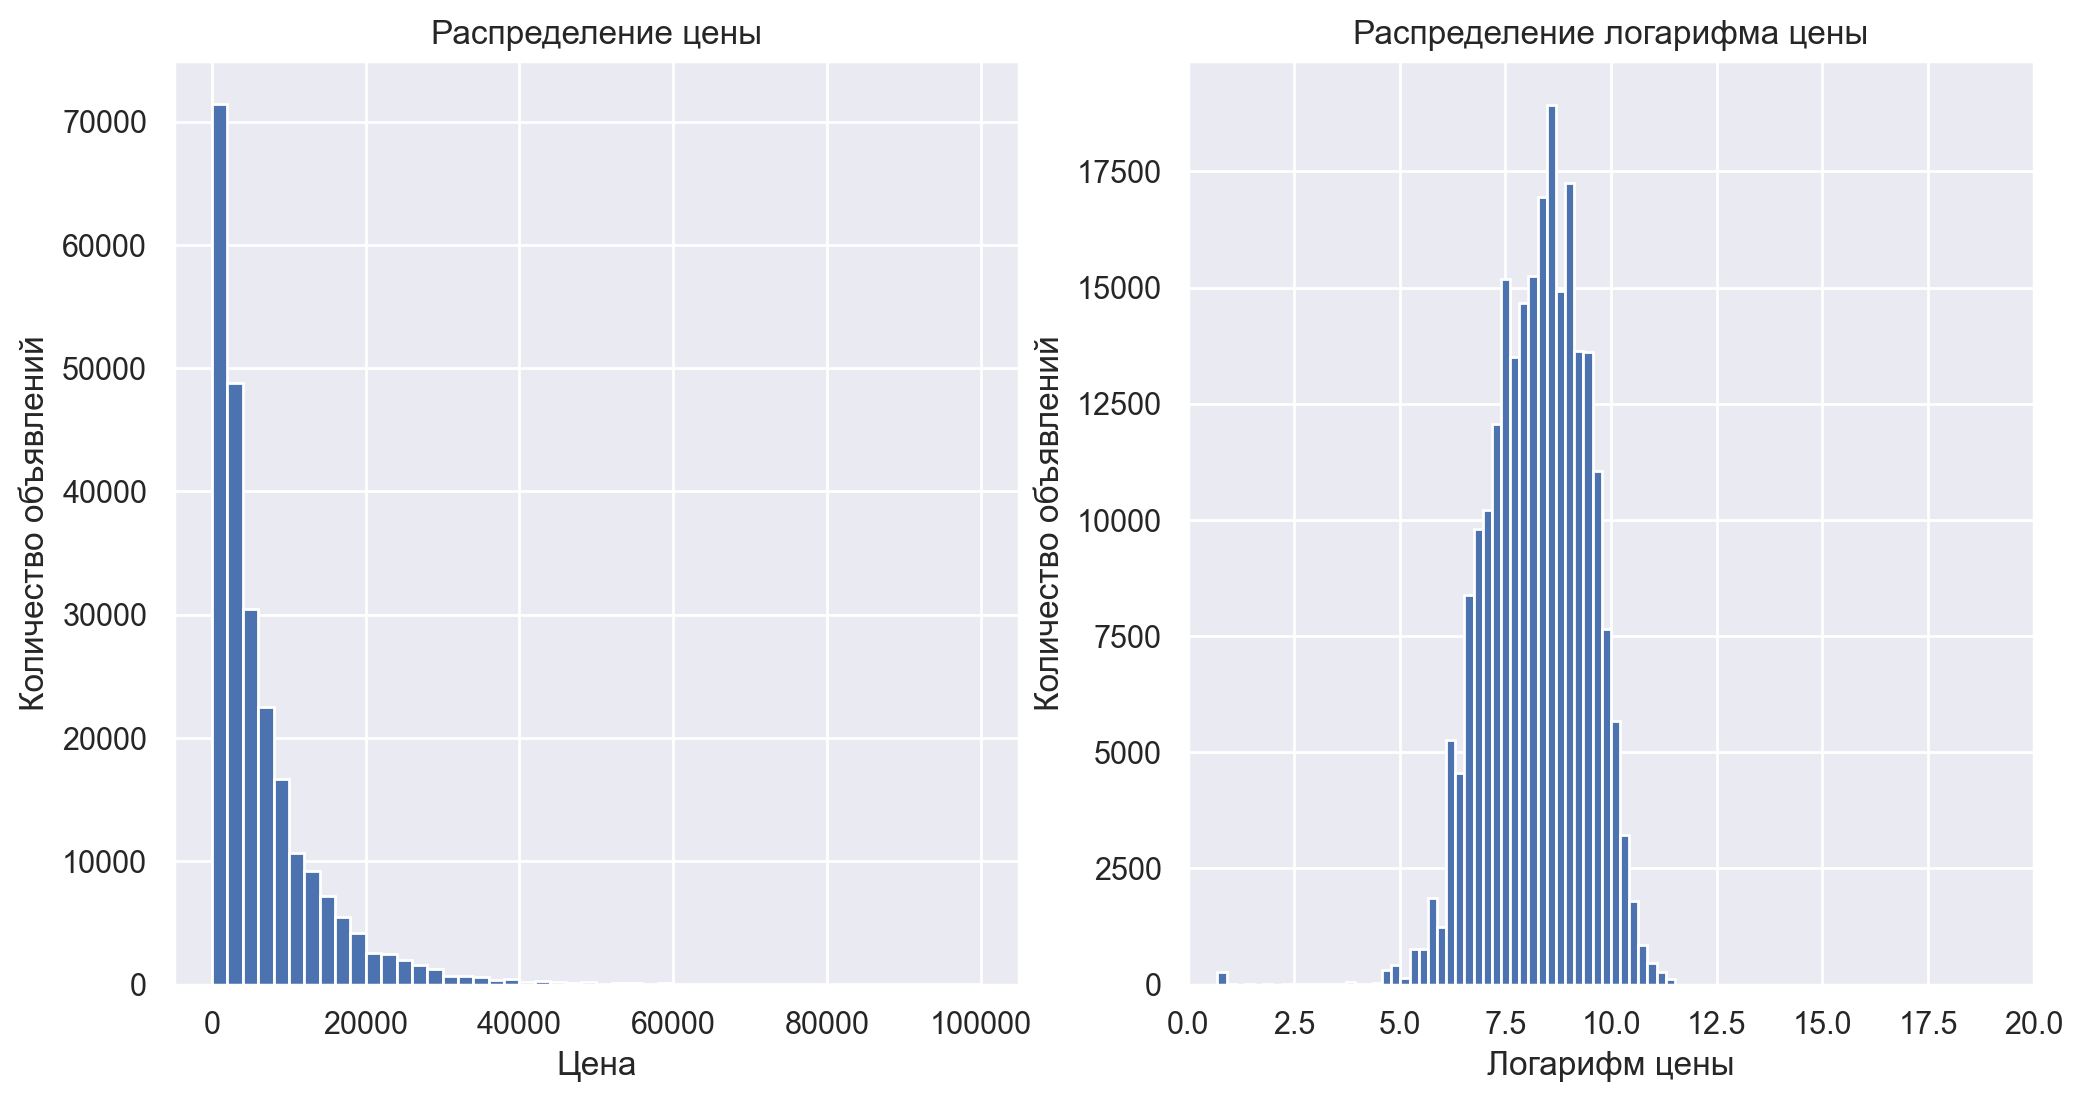

In [15]:
fig, ax = plt.subplots(1, 2)

plt.subplot(1,2,1)
plt.hist(data['price'], bins=50)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')

plt.subplot(1,2,2)
plt.hist(np.log1p(data['price']), bins=50)
plt.title('Распределение логарифма цены')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество объявлений')
plt.xlim(0,20)

plt.show()

Очень часто цену нужно логарифмировать. Этот случай не исключение - изначальное распределение несимметричное, после логарифмирования оно уже близко к нормальному. Тогда добавлю столбец с логарифмом таргета. Из выбросов я вижу только один с логарифом цены близким к 0 - уберем его. Выброс с максимальной ценой похоже не видно при таком масштабе, но его я тоже уберу

In [8]:
min_quant = data.quantile(q=.025, axis=0).price
max_quant = data.quantile(q=.99, axis=0).price
data = data.loc[data['price'].between (min_quant, max_quant)]

/var/folders/rg/_4q96gvs2b55r2rpp991v4w00000gq/T/ipykernel_1318/1516931265.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_quant = data.quantile(q=.025, axis=0).price
/var/folders/rg/_4q96gvs2b55r2rpp991v4w00000gq/T/ipykernel_1318/1516931265.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  max_quant = data.quantile(q=.99, axis=0).price


In [17]:
data.describe()

powerPS      kilometer  autoAgeMonths          price
count  232852.000000  232852.000000  232852.000000  232852.000000
mean      130.714119  124056.825795     143.446880    6603.503161
std        57.760992   39353.447666      71.774752    6597.423248
min        51.000000    5000.000000       1.000000     450.000000
25%        90.000000  100000.000000      92.000000    1890.000000
50%       120.000000  150000.000000     138.000000    4230.000000
75%       160.000000  150000.000000     190.000000    8990.000000
max       585.000000  150000.000000     600.000000   37900.000000

In [9]:
data['log_price'] = np.log1p(data['price'])

/var/folders/rg/_4q96gvs2b55r2rpp991v4w00000gq/T/ipykernel_1318/2447182385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = np.log1p(data['price'])


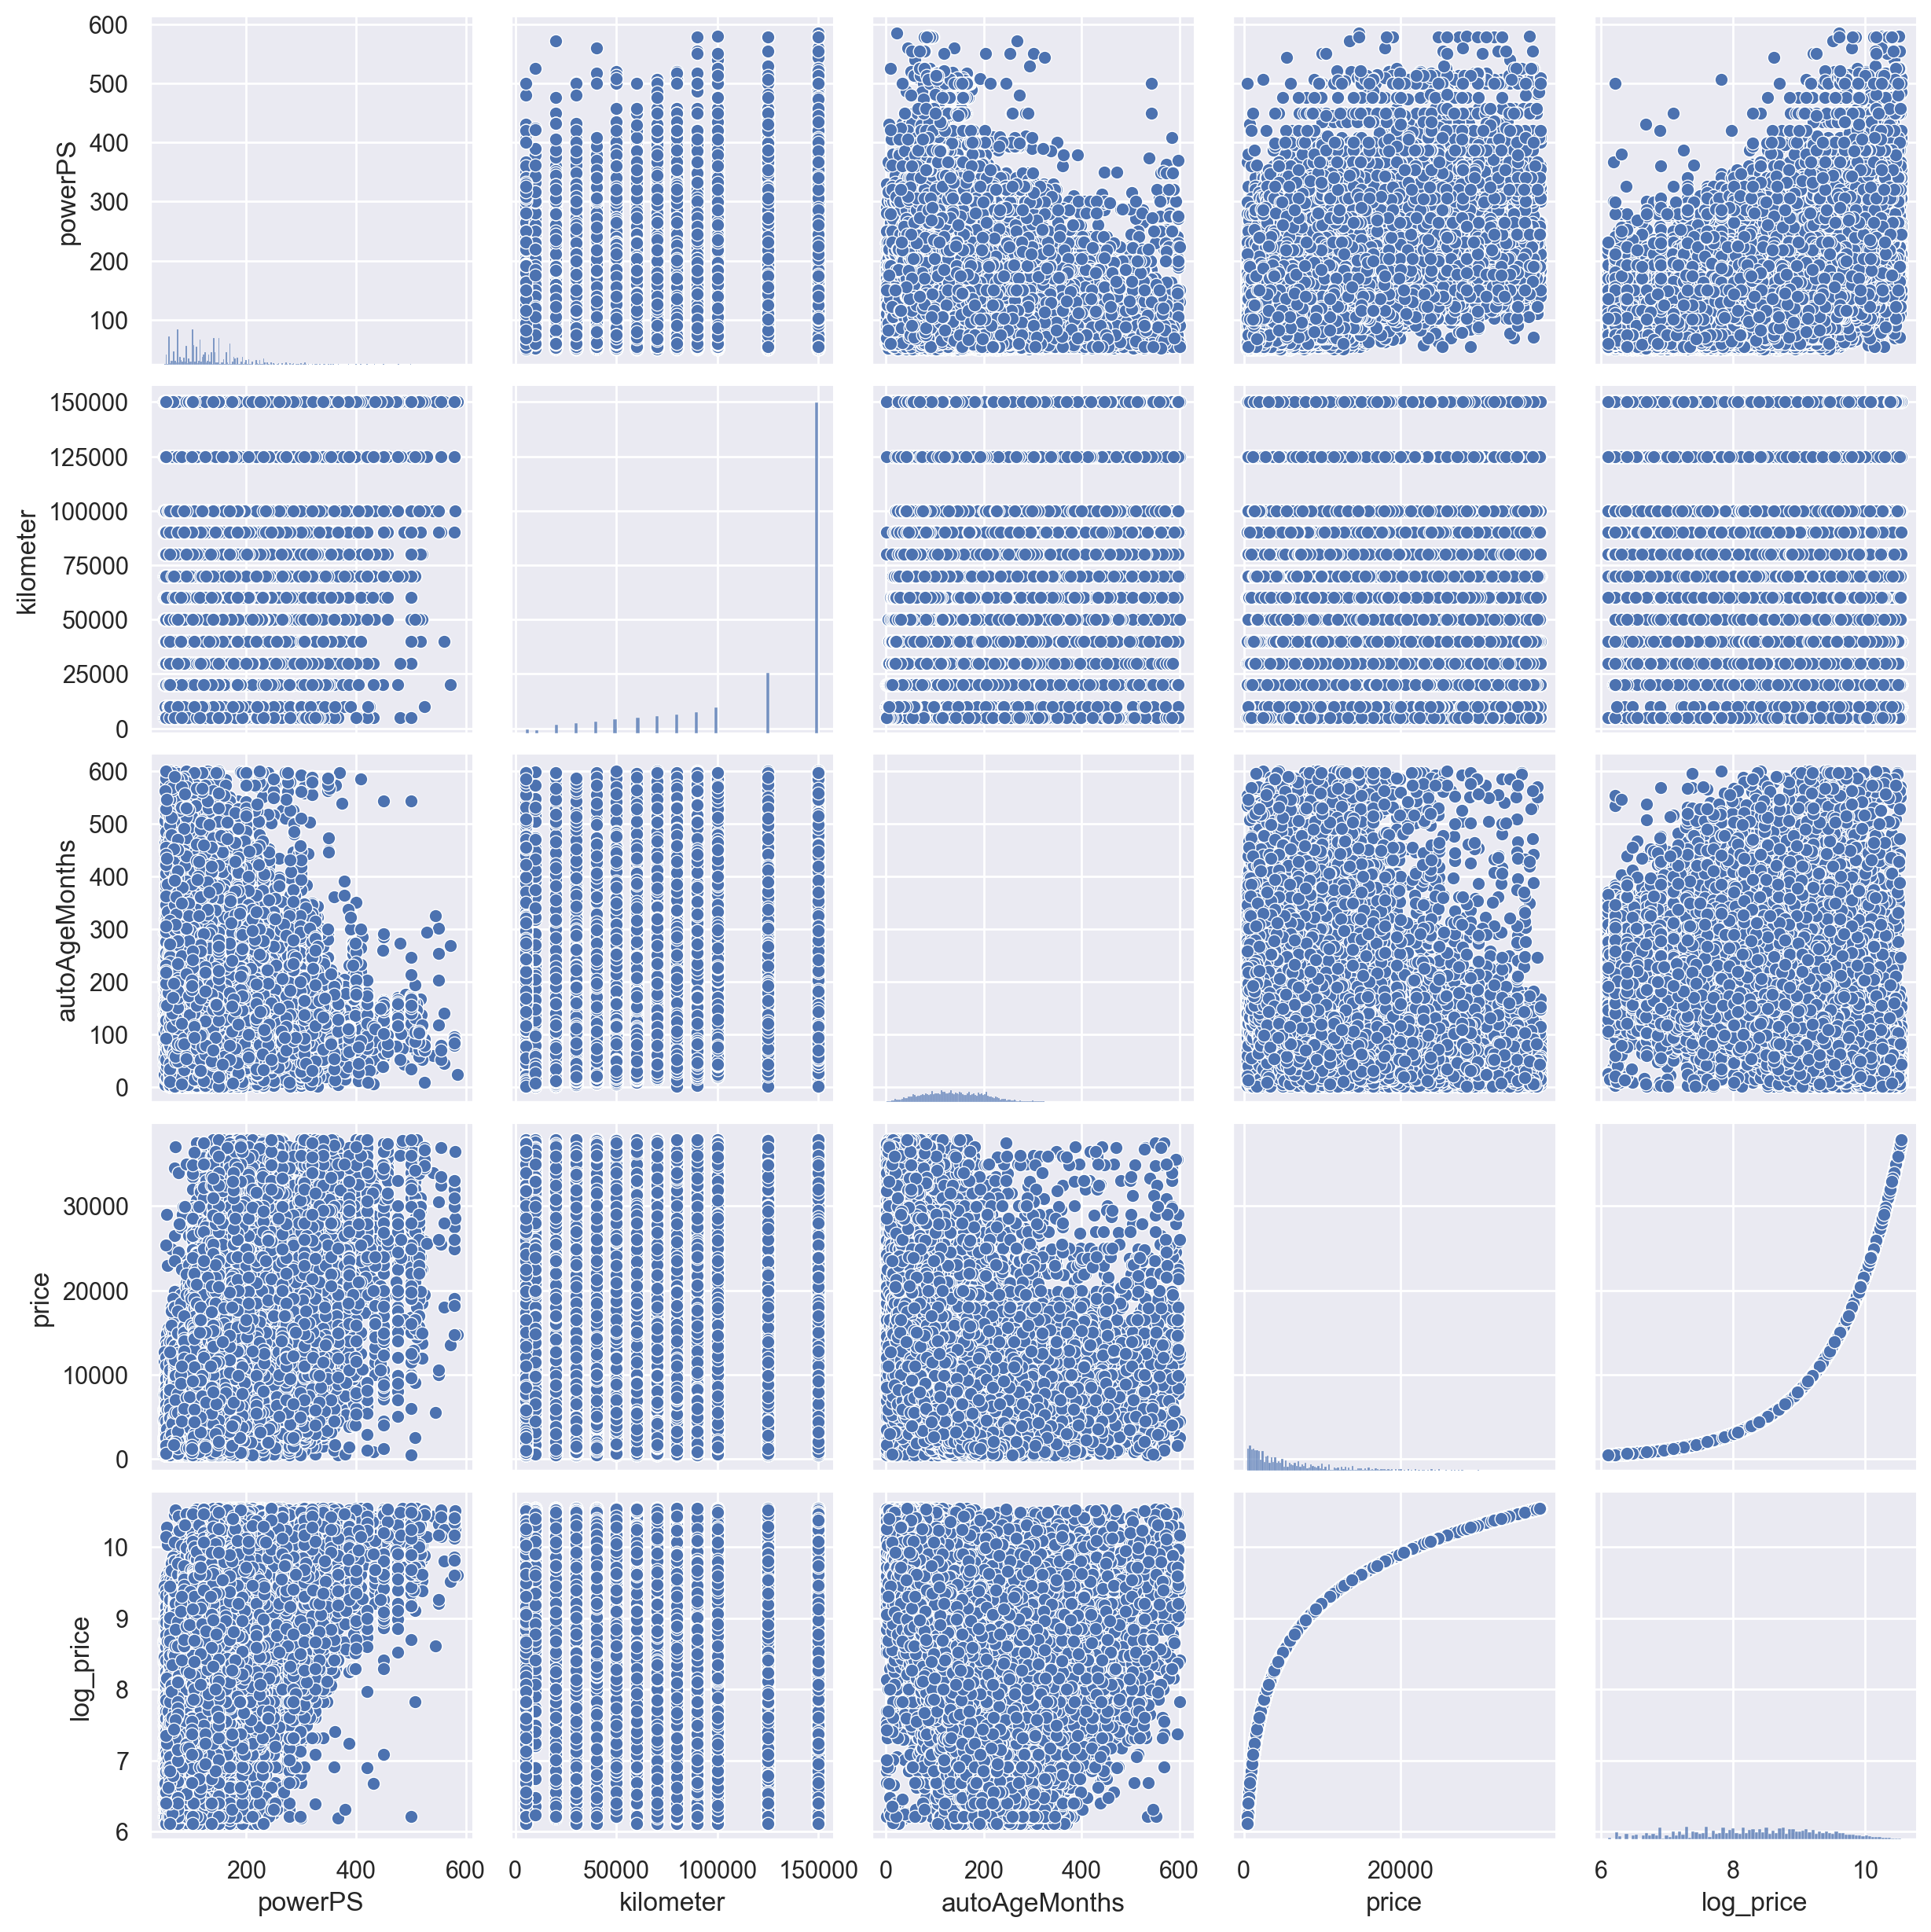

In [19]:
sns.pairplot(data)
plt.show()

Посмотрим на зависимость `log_price` от остальных числовых признаков, кроме `price` конечно же. Можем заметить, что чем больше `powerPS`, тем больше и логарифм цены. Это логично - мощные машины стоят дороже. С `kilometer` не совсем понятно. Кажется, что цена практически не меняется от пробега, но по логике между ними должна быть какая-то связь. А вот с `autoAgeMonths` интереснее. Видно, что зависимость нелинейная - поначалу чем старше машина, тем возможная цена ниже, но вот потом она наоборот начинает расти. Это можно объяснить тем, что это уже какие-то редкие коллекционные машины

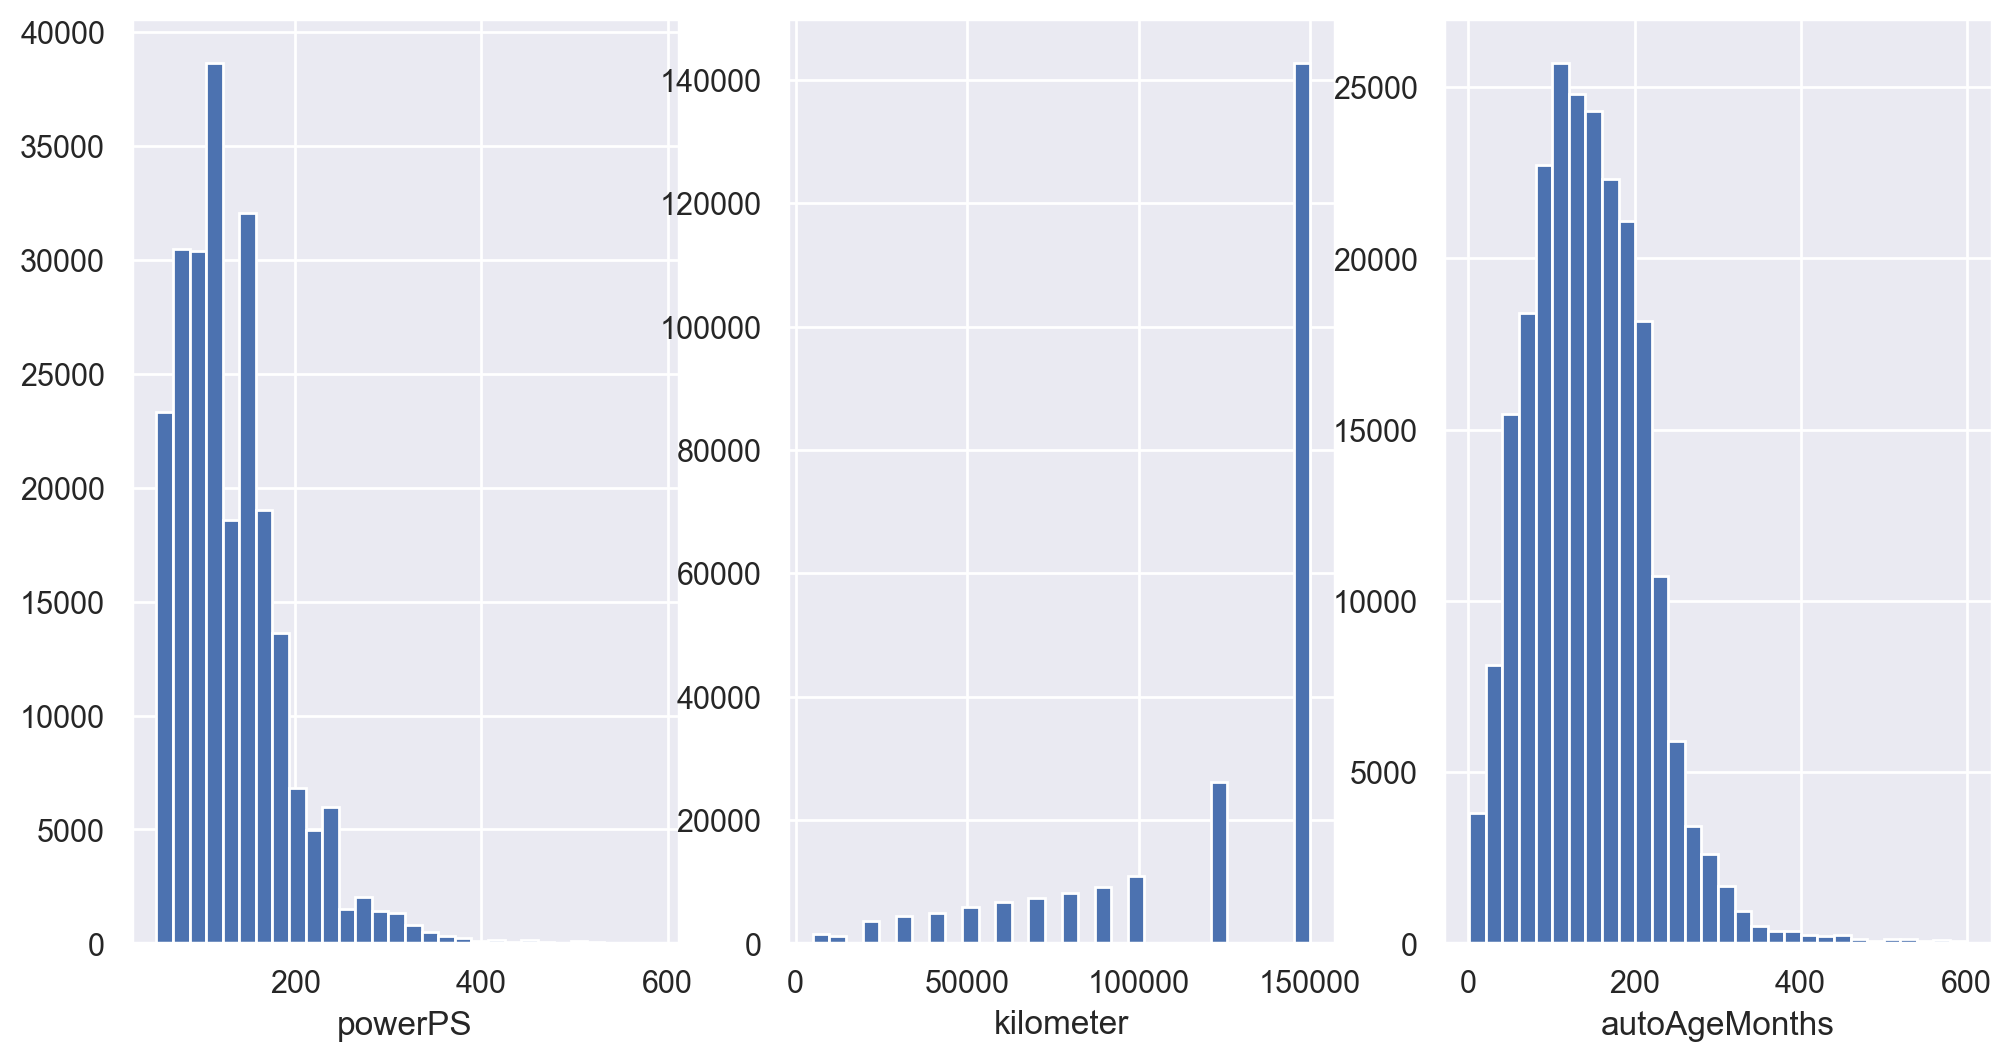

In [20]:
fig, ax = plt.subplots(1, 3)

plt.subplot(1,3,1)
plt.hist(data['powerPS'], bins=30)
plt.xlabel('powerPS')

plt.subplot(1,3,2)
plt.hist(data['kilometer'], bins=30)
plt.xlabel('kilometer')

plt.subplot(1,3,3)
plt.hist(data['autoAgeMonths'], bins=30)
plt.xlabel('autoAgeMonths')

plt.show()

Кажется, выбросов нет

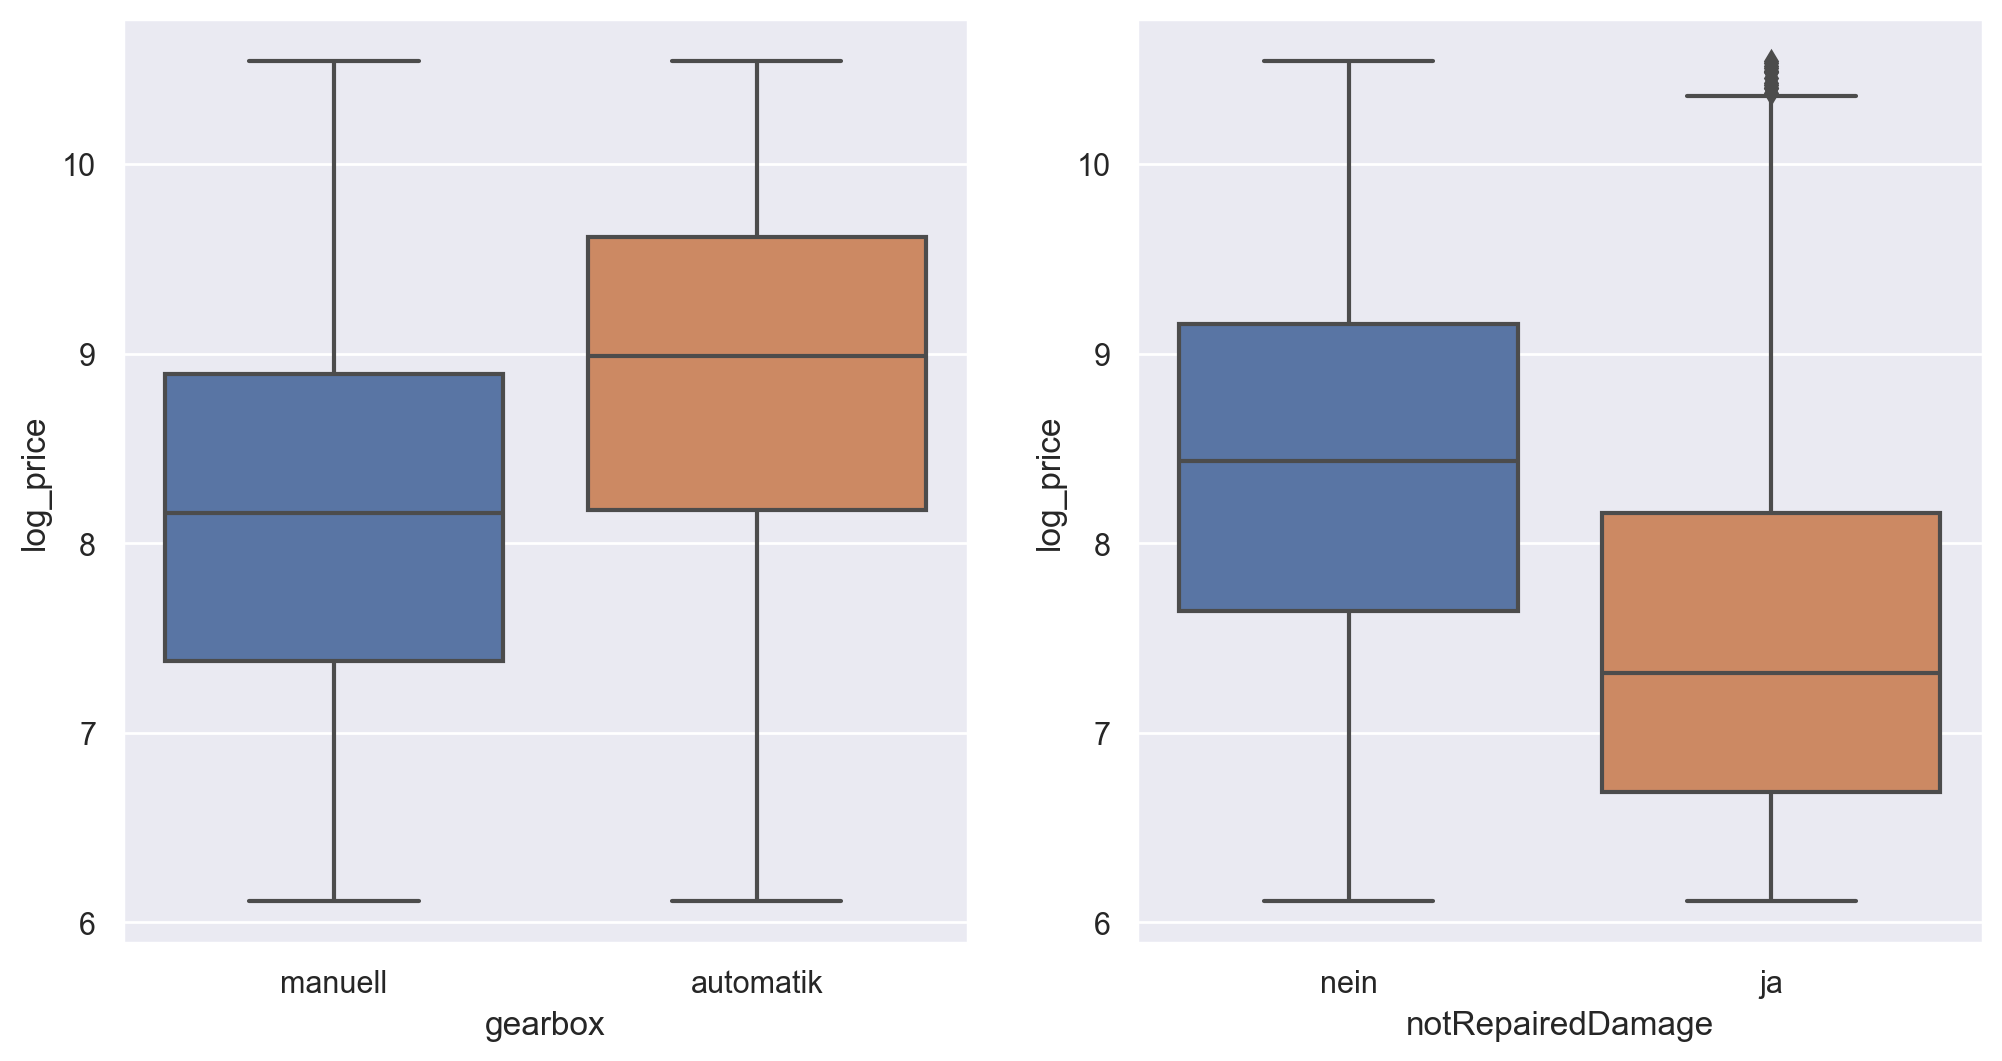

In [21]:
fig, ax = plt.subplots(1, 2)

plt.subplot(1,2,1)
sns.boxplot(data, x='gearbox', y='log_price')
plt.xlabel('gearbox')
plt.ylabel('log_price')

plt.subplot(1,2,2)
sns.boxplot(data, x='notRepairedDamage', y='log_price')
plt.xlabel('notRepairedDamage')
plt.ylabel('log_price')


plt.show()

Хорошие признаки. Автомобиль с автоматической коробкой в среднем дороже. Неотремонтированный автомобиль дешевле

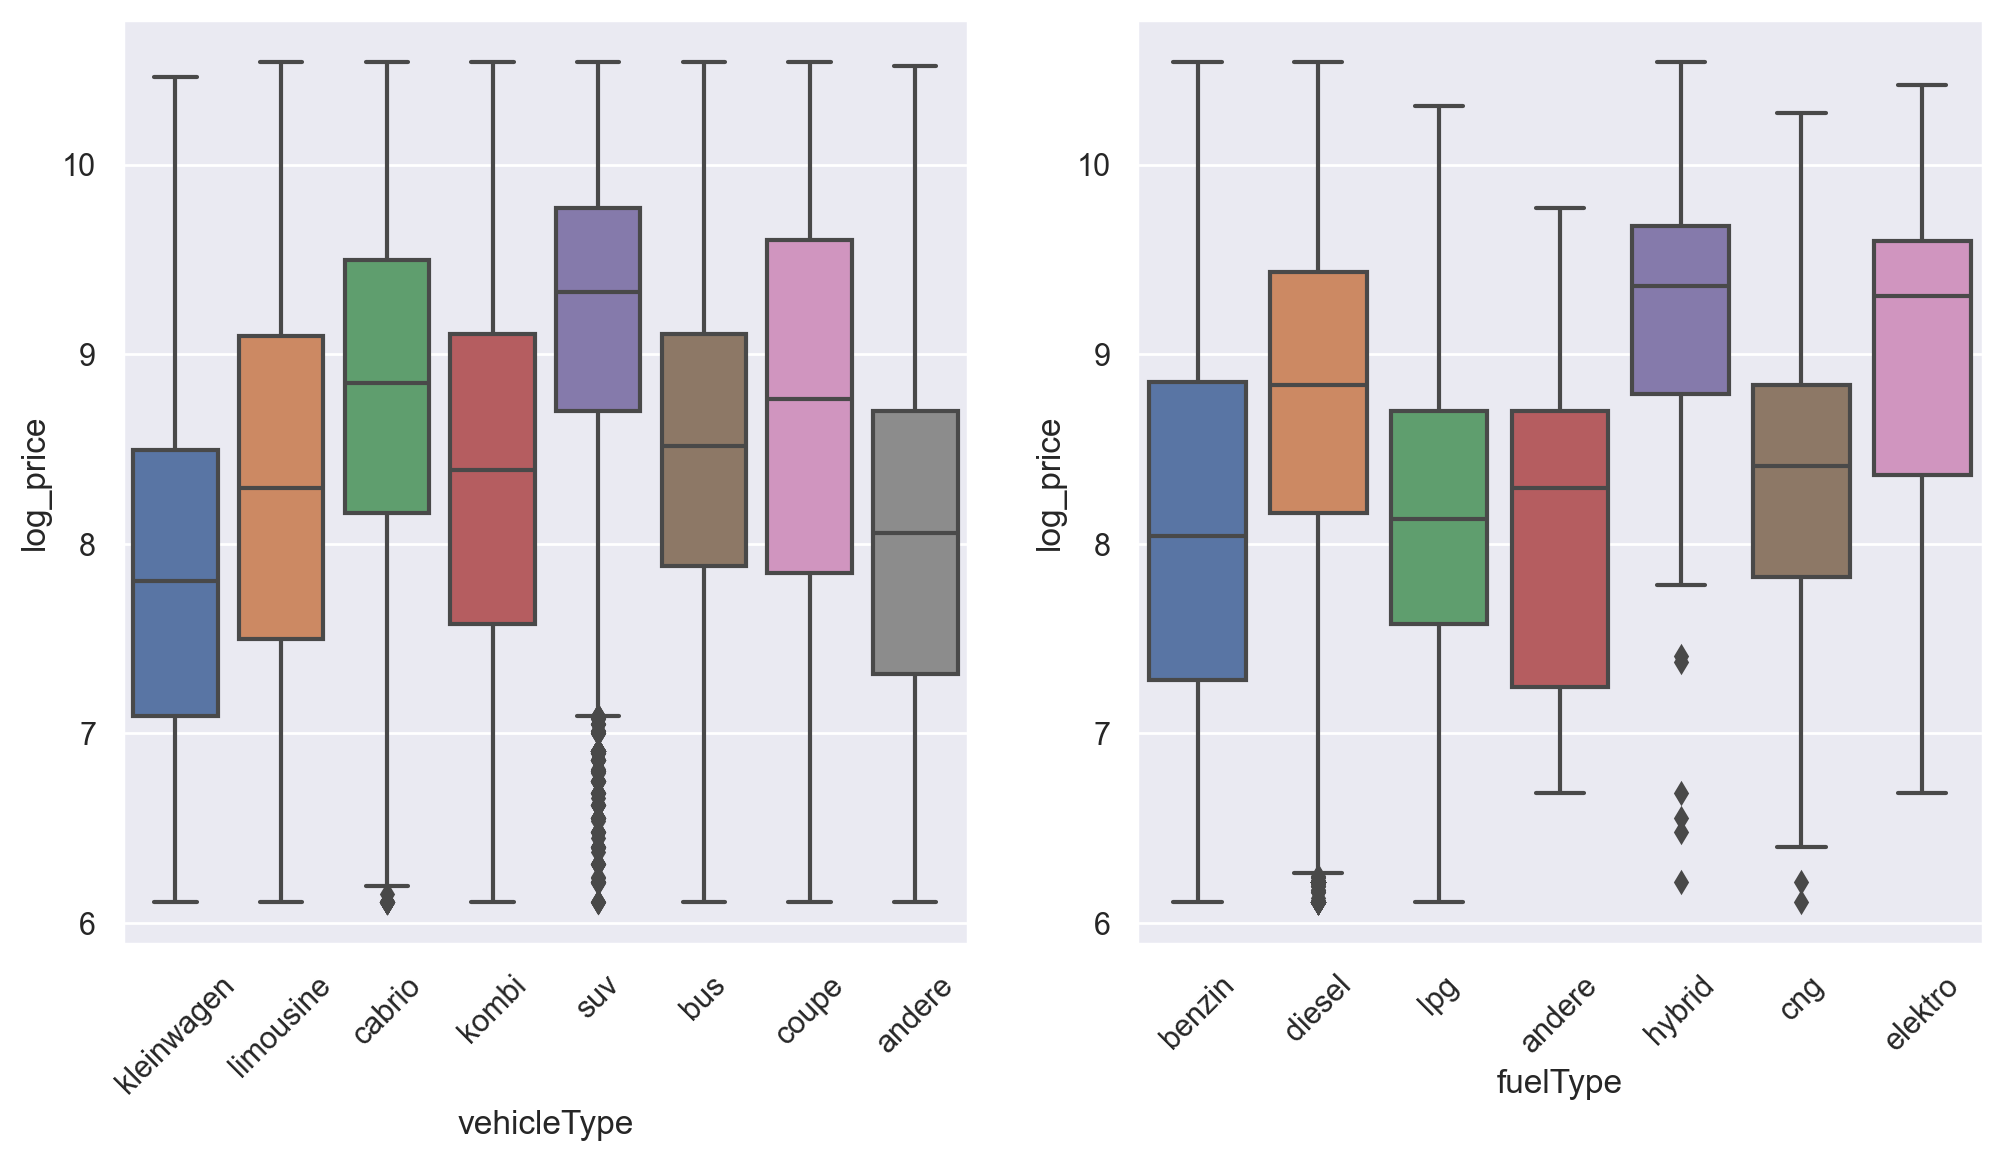

In [22]:
fig, ax = plt.subplots(1, 2)

plt.subplot(1,2,1)
sns.boxplot(data, x='vehicleType', y='log_price')
plt.xlabel('vehicleType')
plt.ylabel('log_price')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data, x='fuelType', y='log_price')
plt.xlabel('fuelType')
plt.ylabel('log_price')
plt.xticks(rotation=45)

plt.show()

Тоже хорошие признаки, по которым можно определять цену. В завимости от типа кузов может быть разная цена. Аналогично с типом топлива

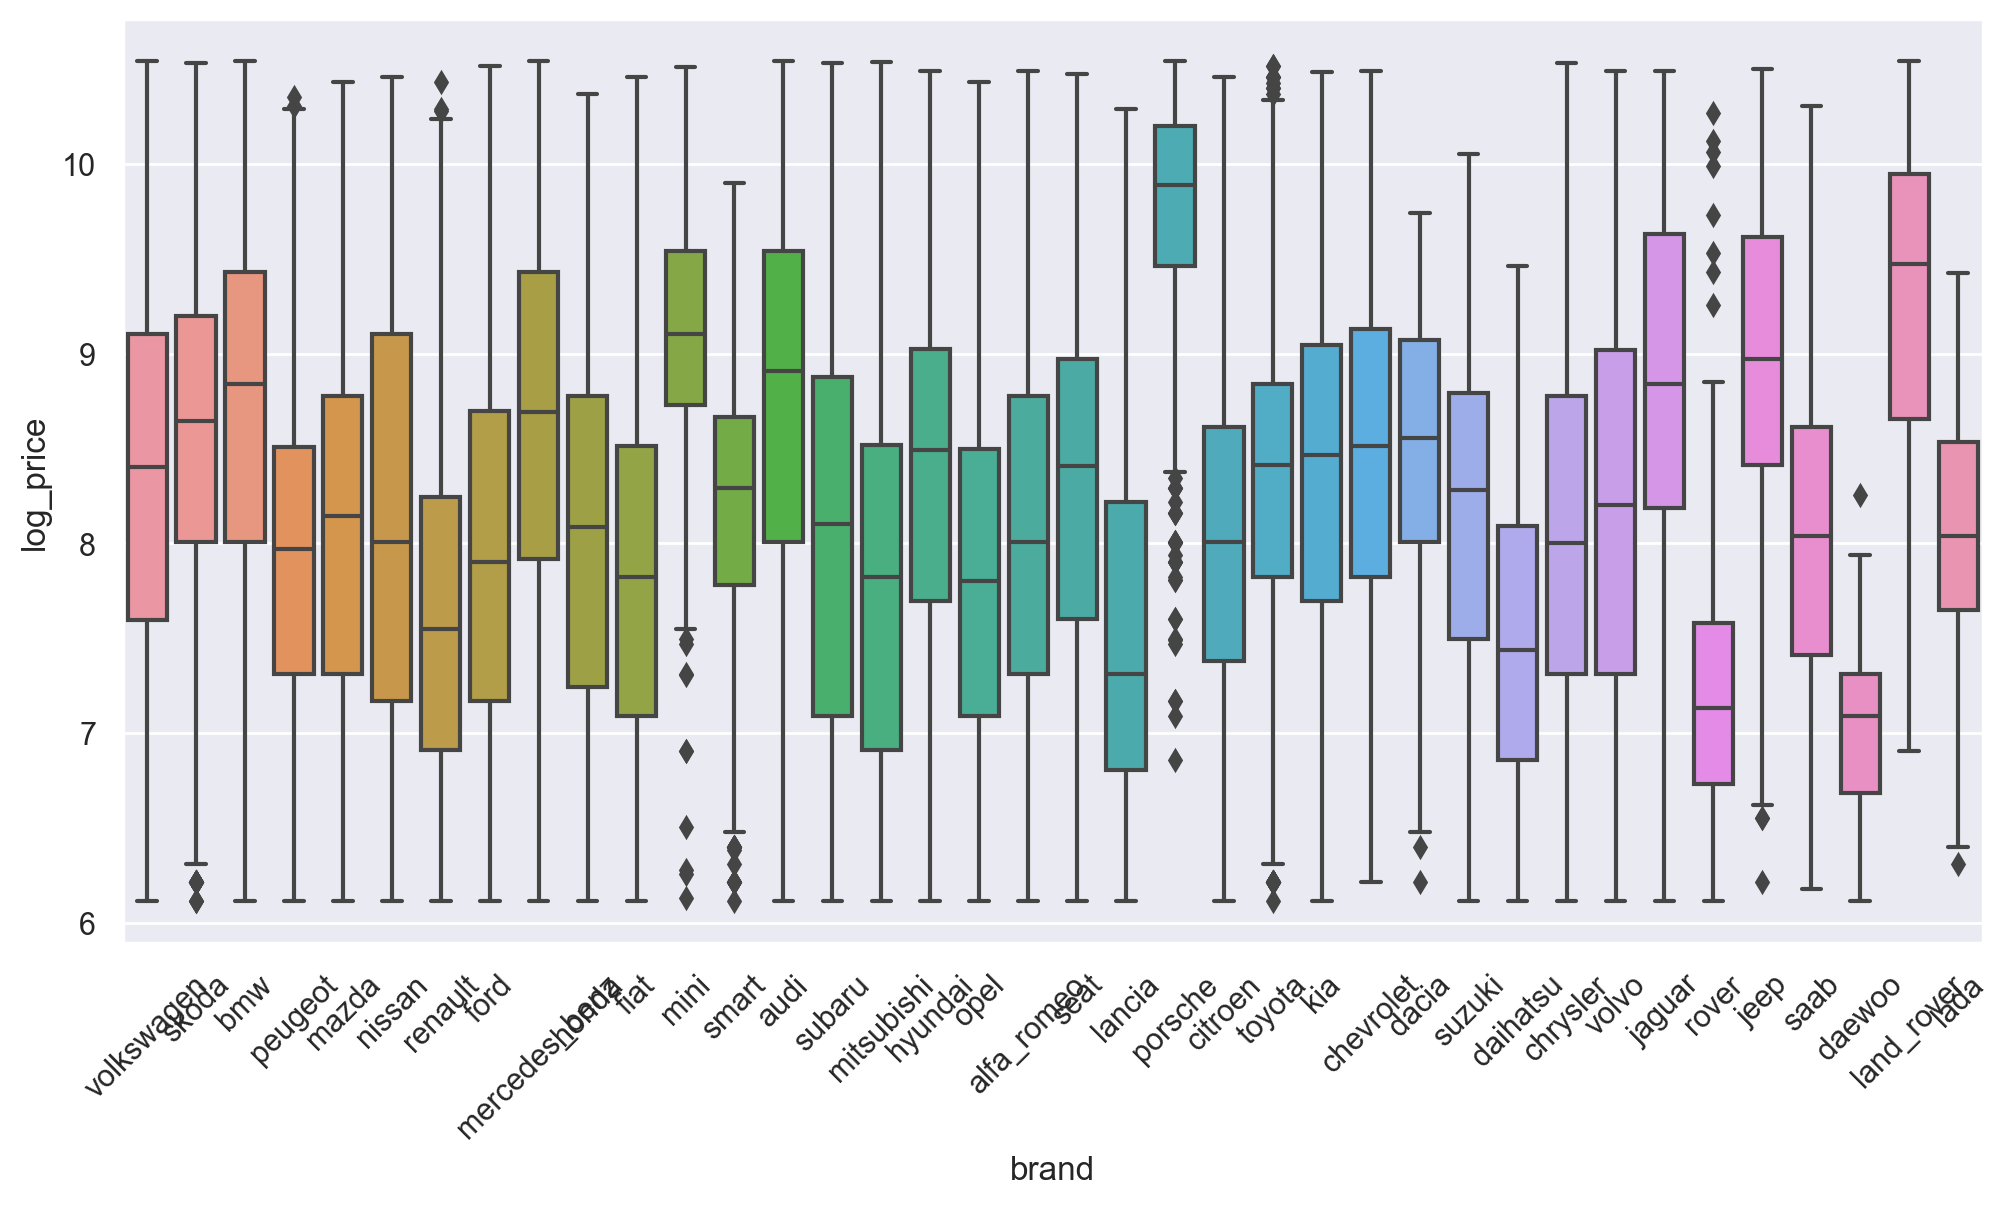

In [23]:
sns.boxplot(data, x='brand', y='log_price')
plt.xlabel('brand')
plt.ylabel('log_price')
plt.xticks(rotation=45)
plt.show()

В целом относительно `brand` тоже цена может регулироваться. Но делать для каждого бренда отдельную категорию кажется не лучшая идея. Думаю, будет лучше добавить премиум сегмент, куда надо добавить бренды, для которых средняя цена сильно выше. По графику это porsche, land_rover, jeep, jaguar, audi, mini. 

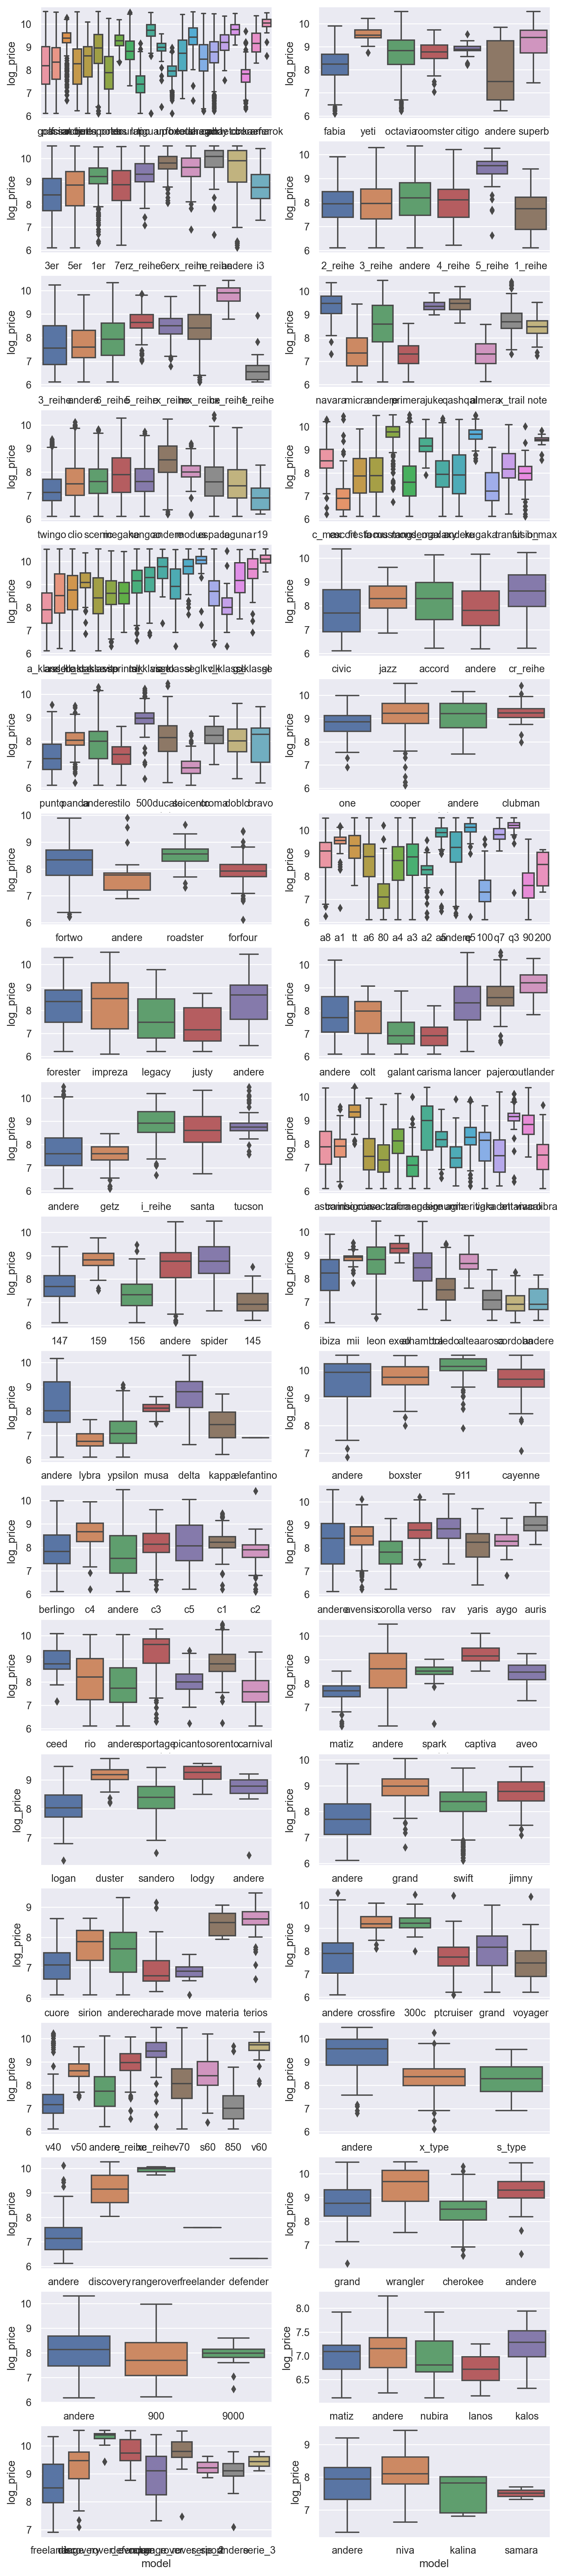

In [24]:
brands = data['brand'].unique()

fig = plt.figure(figsize = (10, 50))

for i, brand in enumerate(brands):
        plt.subplot(19,2, i + 1)
        sns.boxplot(data.loc[data['brand'] == brand, ['model','log_price']], x='model', y='log_price')
        
plt.show()

Не знаю, как это красивее нарисовать)), но я бы не стал использовать этот признак. Просто потому что моделей во всем датасете много и если их кодировать, например, с помощью ohe, то получится очень много признаков, а данных у нас не так много

In [25]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

Выделю премиум сегмент:

In [10]:
data['is_premium'] = 0
data.loc[data.brand.isin(['porsche', 'land_rover', 'jeep', 'jaguar', 'audi', 'mini']), 'is_premium'] = 1

/var/folders/rg/_4q96gvs2b55r2rpp991v4w00000gq/T/ipykernel_1318/2148220349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_premium'] = 0


In [11]:
categorical = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['is_premium']


# YOUR CODE (EDA):

In [12]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

/var/folders/rg/_4q96gvs2b55r2rpp991v4w00000gq/T/ipykernel_1318/3698194411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bias'] = 1


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.111, random_state=42) 

y_train = y_train.values
y_test = y_test.values
y_val = y_val.values

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [50]:
dimension = x.shape[1]

descent_config = {
    'descent_name': descent_name,
    'kwargs': {
        'dimension': dimension
    }
}


In [24]:
pd.options.display.expand_frame_repr = False #отключаю перенос датафрейма на следующую строку при выводе

In [78]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

gradients = ['full', 'stochastic', 'momentum', 'adam']
lambdas = np.logspace(-3, 0.05, 20)

lambda_list = []
best_lambda = {}
R_2_list_train = []
R_2_list_val = []
R_2_list_test = []
mse_list_train = []
mse_list_val = []
mse_list_test = []
res = pd.DataFrame()

for grad in gradients:
    descent_config['descent_name'] = grad
    for lamb in lambdas:
        descent_config['kwargs']['lambda_'] = lamb
        lambda_list.append(lamb)
        #обучаемся
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(x_train, y_train)
        #делаем предсказания
        y_pred_train = regression.predict(x_train)
        y_pred_val = regression.predict(x_val)
        y_pred_test = regression.predict(x_test)
        #смотрим на ошибки (можно было использовать regression.calc_loss, но я уже написал с мсе и мне лень переделывать, а так это одно и то же)
        mse_list_train.append(mean_squared_error(y_train, y_pred_train))
        mse_list_val.append(mean_squared_error(y_val, y_pred_val))
        mse_list_test.append(mean_squared_error(y_test, y_pred_test))
        #считаем качество
        R_2_list_train.append(r2_score(y_train, y_pred_train))
        R_2_list_val.append(r2_score(y_val, y_pred_val))
        R_2_list_test.append(r2_score(y_test, y_pred_test))
        
    best_lambda[grad] = [lambda_list[np.argmax(R_2_list_val)]]
    to_insert = {
            "Gradient": [grad],
            "mse_train": [mse_list_train[np.argmax(R_2_list_val)]],
            "mse_val": [mse_list_val[np.argmax(R_2_list_val)]],
            "mse_test": [mse_list_test[np.argmax(R_2_list_val)]],
            "R_2_train": [R_2_list_train[np.argmax(R_2_list_val)]],
            "R_2_val": [np.amax(R_2_list_val)],
            "R_2_test": [R_2_list_test[np.argmax(R_2_list_val)]],
            "steps": [len(regression.loss_history)],
            "lambda":  best_lambda[grad]
        }
        
    res = pd.concat([res, pd.DataFrame(to_insert)], ignore_index=True)
    R_2_list_val.clear()
    R_2_list_test.clear()

    
res.head(10)

Gradient  mse_train   mse_val  mse_test  R_2_train   R_2_val  R_2_test  \
0        full   0.294578  0.283371  0.289136   0.720142  0.732450  0.724068   
1  stochastic   0.328255  0.317058  0.323020   0.688147  0.720103  0.711812   
2    momentum   0.328255  0.317058  0.323020   0.688147  0.722899  0.714476   
3        adam   0.369359  0.358340  0.362213   0.649097  0.740963  0.731897   

   steps    lambda  
0     35  1.122018  
1    301  0.535732  
2    118  0.535732  
3     73  0.370187

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

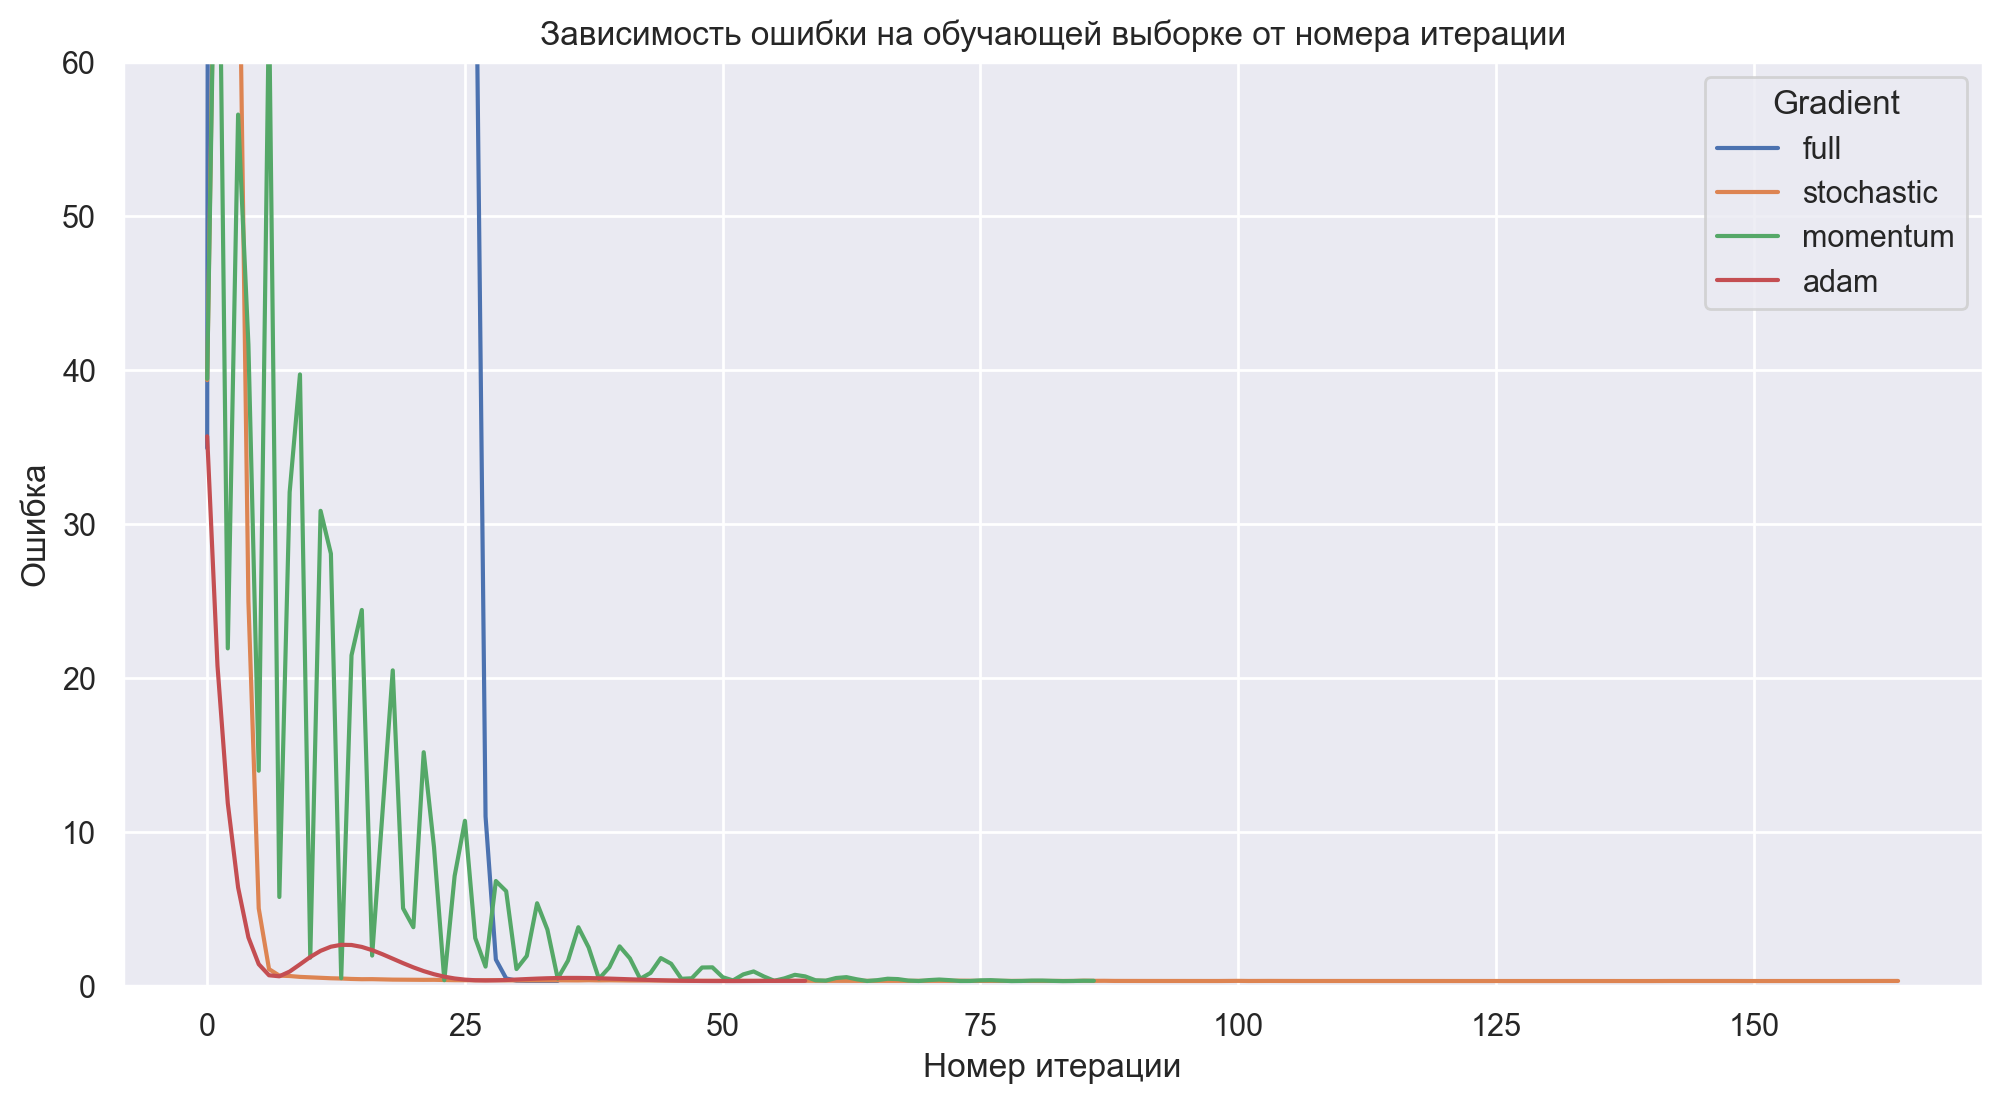

In [79]:
regression_graph = pd.DataFrame()

for grad,lamb in best_lambda.items():
    descent_config = {
    'descent_name': grad,
    'kwargs': {
        'dimension': dimension,
        'lambda_': float(lamb[0])
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train, y_train)
    to_insert = {
            "Gradient": [grad for i in range(len(regression.loss_history))],
            "Loss_history": regression.loss_history
        }
    regression_graph = pd.concat([regression_graph, pd.DataFrame(to_insert)], ignore_index=True)
    plt.plot(np.arange(0, len(regression.loss_history)), regression.loss_history, label=grad)
    
    
plt.legend(title='Gradient')
plt.title('Зависимость ошибки на обучающей выборке от номера итерации')   

plt.ylabel('Ошибка')
plt.xlabel('Номер итерации')

plt.ylim(0,60)

plt.show()

In [80]:
regression_graph

Gradient   Loss_history
0       full      34.893664
1       full     547.661075
2       full    5663.493697
3       full   40112.747087
4       full  207711.099314
..       ...            ...
341     adam       0.297243
342     adam       0.299715
343     adam       0.301726
344     adam       0.303096
345     adam       0.303739

[346 rows x 2 columns]

По качеству модели $R^2$ все спуски примерно одинаковые, но немного лучше остальных adam. На самом деле это не очень стабильно, при перезапуске числа могут измениться. По количеству итераций самой быстрой оказывается полный градиент(что странно, как по мне), но при этом у него есть особенность - у него сначала очень сильно начинает расти ошибка, вплоть до е+7 и потом начинает уменьшаться. В стохастическом градиенте $R^2$ почему-то больше чем в полном(когда я запускал) и еще и скорость сходимости больше...очень интересно. Для моментума видим, что ошибка очень сильно меняется при каждой итерации. У адам самая быстрая сходимость и самый большой $R^2$   
P.S. при каждом запуске все опять меняется)) Когда то стохастический оказывается самым быстрым по сходимости...

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [47]:
import time
batch_sizes = np.arange(5, 500, 10)
steps = []
duration = []
res = pd.DataFrame()

for batch in batch_sizes:
    descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'lambda_': best_lambda['stochastic'][0],
        'batch_size': batch
        }
    }
    batch_steps = []
    duration_steps = []
    for k in range(10):
        regression = LinearRegression(descent_config=descent_config)
        start_time = time.time()
        regression.fit(x_train, y_train)
        duration_steps.append(time.time() - start_time)
        y_pred_val = regression.predict(x_val)
        batch_steps.append(len(regression.loss_history))
    mean_steps = steps.append(np.mean(batch_steps))
    mean_duration = duration.append(np.mean(duration_steps))
    to_insert = {
            'batch_size': [batch],
            'mean_steps': [np.mean(batch_steps)],
            'duration': [np.mean(duration_steps)]
        }
        
    res = pd.concat([res, pd.DataFrame(to_insert)], ignore_index=True)
    
res.head(10)

batch_size  mean_steps  duration
0           5       232.5  0.844069
1          15       224.7  0.927378
2          25       190.8  0.705766
3          35       158.0  0.569387
4          45       152.1  0.584905
5          55       134.4  0.582074
6          65       118.4  0.410957
7          75       108.3  0.426234
8          85       107.3  0.453656
9          95        94.9  0.628988

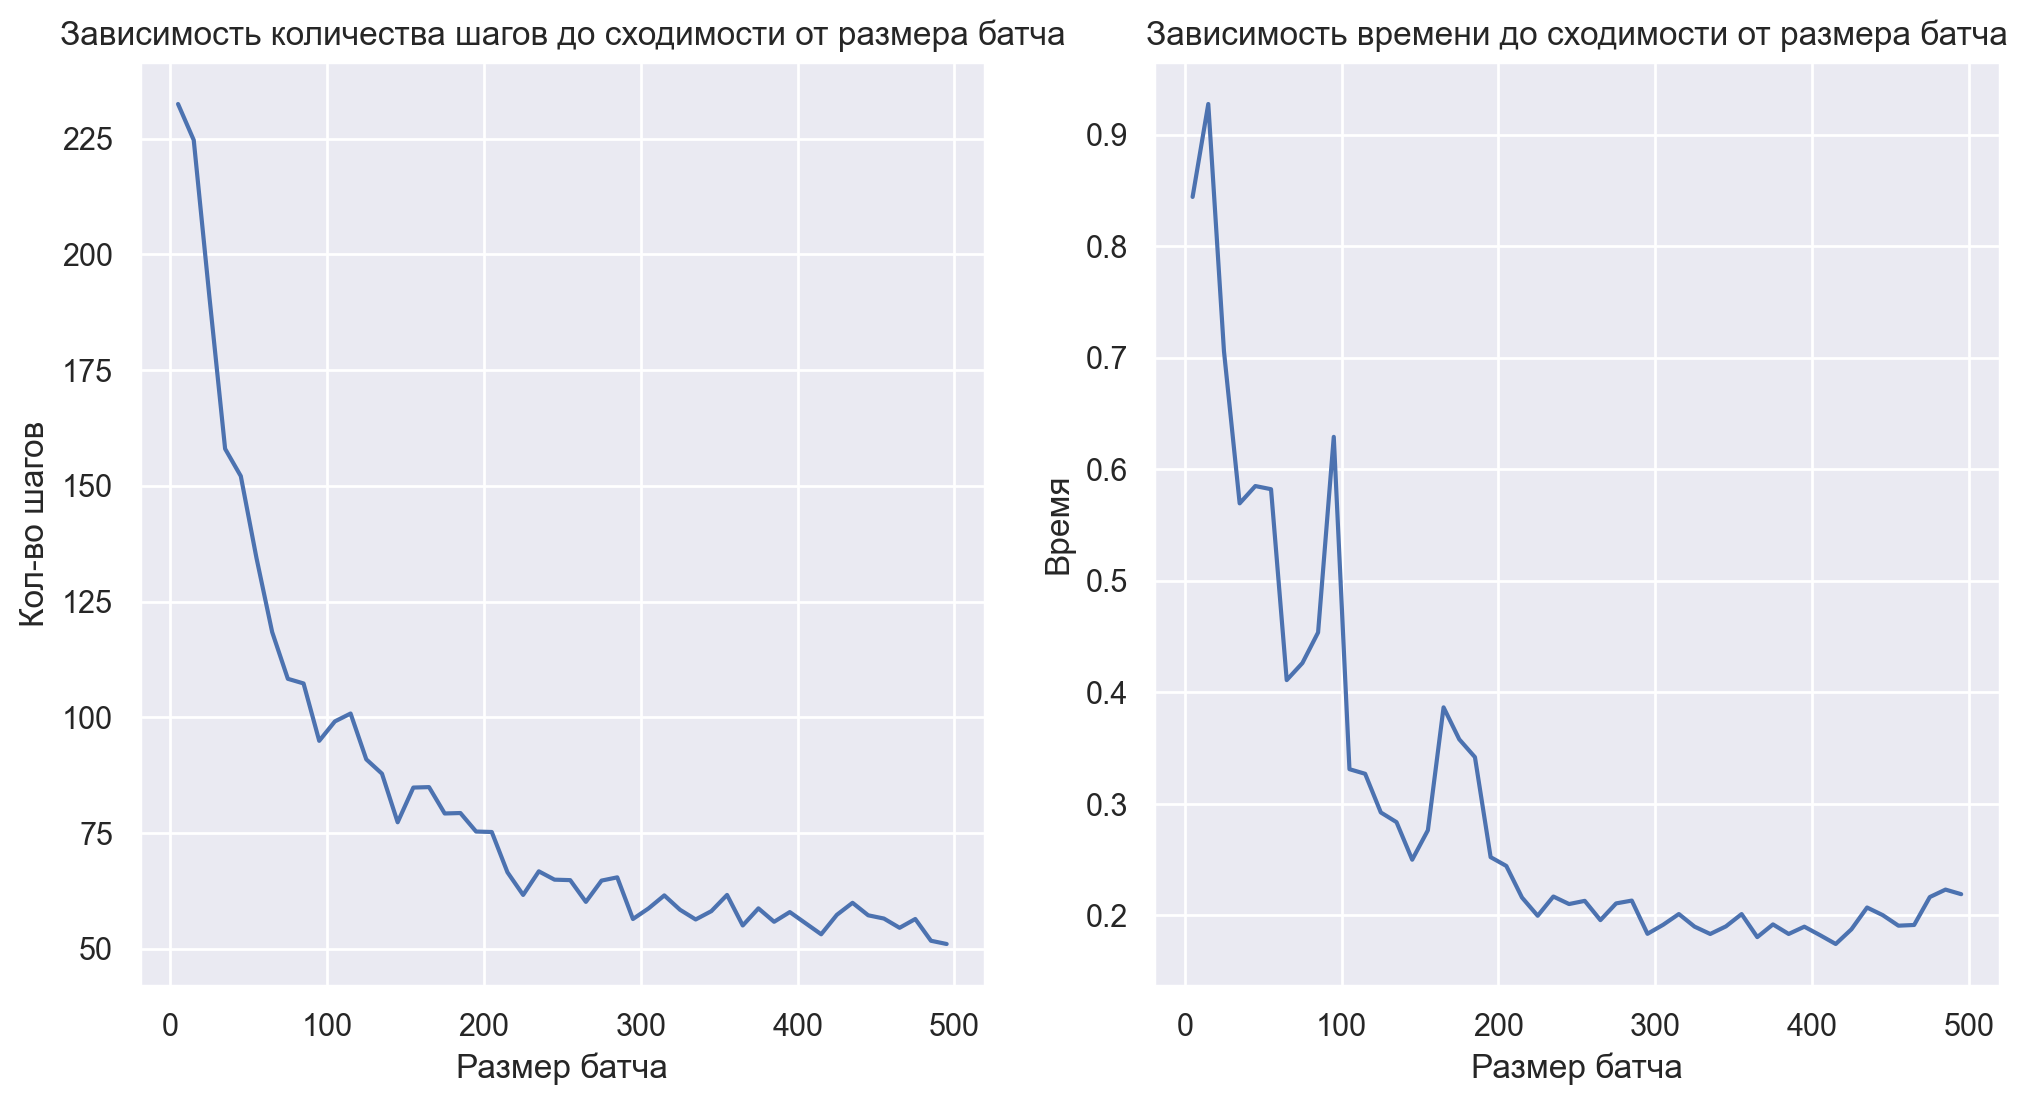

In [48]:
plt.subplot(1,2,1)
plt.plot(res.batch_size, res.mean_steps)
plt.title('Зависимость количества шагов до сходимости от размера батча')
plt.ylabel('Кол-во шагов')
plt.xlabel('Размер батча')

plt.subplot(1,2,2)
plt.plot(res.batch_size, res.duration)
plt.title('Зависимость времени до сходимости от размера батча')
plt.ylabel('Время')
plt.xlabel('Размер батча')

plt.show()

**Вывод:** чем больше размер батча, тем меньше нужно шагов до сходимости и, следовательно, меньше времени до сходимости

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: [тут](https://contest.yandex.ru/contest/41257/run-report/74003903/)

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [20]:
from linear_regression import LinearRegression

In [81]:
dimension = x.shape[1]

descent_config = {
    'descent_name': descent_name,
    'kwargs': {
        'dimension': dimension
    }
}

In [82]:
gradients = ['full', 'stochastic', 'momentum', 'adam']
# gradients = ['full']
lambdas = np.logspace(-3, 0.05, 20)
mus = np.logspace(-3, 1, 20)

lambda_list = []
mus_list = []
best_lambda_reg = {}
R_2_list_train = []
R_2_list_val = []
R_2_list_test = []
mse_list_train = []
mse_list_val = []
mse_list_test = []
res_reg = pd.DataFrame()
regular = pd.DataFrame()

for grad in gradients:
    descent_config['descent_name'] = grad
    descent_config['descent_name'] = 'full'
    for mu in mus:
        descent_config['kwargs']['mu'] = mu
        mus_list.append(mu)
        for lamb in lambdas:
            descent_config['kwargs']['lambda_'] = lamb
            lambda_list.append(lamb)
            #обучаемся
            regression_reg = LinearRegression(descent_config=descent_config)
            regression_reg.fit(x_train, y_train)
            #делаем предсказания
            y_pred_train = regression_reg.predict(x_train)
            y_pred_val = regression_reg.predict(x_val)
            y_pred_test = regression_reg.predict(x_test)
            #смотрим на ошибки (можно было использовать regression.calc_loss, но я уже написал с мсе и мне лень переделывать, а так это одно и то же)
            mse_list_train.append(mean_squared_error(y_train, y_pred_train))
            mse_list_val.append(mean_squared_error(y_val, y_pred_val))
            mse_list_test.append(mean_squared_error(y_test, y_pred_test))
            #считаем качество
            R_2_list_train.append(r2_score(y_train, y_pred_train))
            R_2_list_val.append(r2_score(y_val, y_pred_val))
            R_2_list_test.append(r2_score(y_test, y_pred_test))
        best_lambda_reg[grad] = [lambda_list[np.argmax(R_2_list_val)]]
        
        to_insert = {
                "Gradient": [grad],
                "mu": [mu],
                "mse_train": [mse_list_train[np.argmax(R_2_list_val)]],
                "mse_val": [mse_list_val[np.argmax(R_2_list_val)]],
                "mse_test": [mse_list_test[np.argmax(R_2_list_val)]],
                "R_2_train": [R_2_list_train[np.argmax(R_2_list_val)]],
                "R_2_val": [np.amax(R_2_list_val)],
                "R_2_test": [R_2_list_test[np.argmax(R_2_list_val)]],
                "steps": [len(regression.loss_history)],
                "lambda":  best_lambda_reg[grad]
            }
        
        
        regular = pd.concat([regular, pd.DataFrame(to_insert)], ignore_index=True)
        R_2_list_train.clear()
        R_2_list_val.clear()
        R_2_list_test.clear()
        mse_list_train.clear()
        mse_list_val.clear()
        mse_list_test.clear()
    #выбираем максимум
    insert = regular[regular['R_2_val']==regular['R_2_val'].max()]
    res_reg = pd.concat([res_reg, insert], ignore_index=True)
# print(regular.head(20))    
res_reg

KeyboardInterrupt: 

Дальше не успел до конца дописать

In [39]:
for index,row in res_reg.iterrows():
    descent_config = {
    'descent_name': grad,
    'kwargs': {
        'dimension': dimension,
        'lambda_': float(lamb[0])
        'mu': 
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train, y_train)
    to_insert = {
            "Gradient": [grad for i in range(len(regression.loss_history))],
            "Loss_history": regression.loss_history
        }
    regression_graph = pd.concat([regression_graph, pd.DataFrame(to_insert)], ignore_index=True)
    plt.plot(np.arange(0, len(regression.loss_history)), regression.loss_history, label=grad)
    
    
plt.legend(title='Gradient')
plt.title('Зависимость ошибки на обучающей выборке от номера итерации')   

plt.ylabel('Ошибка')
plt.xlabel('Номер итерации')

plt.ylim(0,60)

plt.show()

Gradient        mu  mse_train   mse_val  mse_test  R_2_train   R_2_val  \
0      full  0.001000   0.300215  0.288354  0.294316   0.714786  0.727745   
1      full  0.001624   0.300215  0.288354  0.294316   0.714786  0.734930   
2      full  0.002637   0.300215  0.288354  0.294316   0.714786  0.728066   
3      full  0.004281   0.300215  0.288354  0.294316   0.714786  0.733891   
4      full  0.006952   0.300215  0.288354  0.294316   0.714786  0.725607   
5      full  0.011288   0.300215  0.288354  0.294316   0.714786  0.725122   
6      full  0.018330   0.300215  0.288354  0.294316   0.714786  0.732738   
7      full  0.029764   0.300215  0.288354  0.294316   0.714786  0.731785   
8      full  0.048329   0.300215  0.288354  0.294316   0.714786  0.734538   
9      full  0.078476   0.300215  0.288354  0.294316   0.714786  0.732564   
10     full  0.127427   0.300215  0.288354  0.294316   0.714786  0.731112   
11     full  0.206914   0.300215  0.288354  0.294316   0.714786  0.727744   
12     full  0.335982   0.300215  0.288354  0.294316   0.714786  0.718792   
13     full  0.545559   0.300215  0.288354  0.294316   0.714786  0.701900   
14     full  0.885867   0.300215  0.288354  0.294316   0.714786  0.673413   
15     full  1.438450   0.300215  0.288354  0.294316   0.714786  0.627759   
16     full  2.335721   0.300215  0.288354  0.294316   0.714786  0.560937   
17     full  3.792690   0.300215  0.288354  0.294316   0.714786  0.473264   

    R_2_test  steps    lambda  
0   0.719124     35  1.122018  
1   0.725295     35  1.122018  
2   0.719583     35  1.122018  
3   0.725739     35  1.122018  
4   0.718026     35  1.122018  
5   0.717717     38  1.122018  
6   0.724128     47  1.122018  
7   0.723912     71  1.122018  
8   0.726066    109  1.122018  
9   0.724273    142  1.122018  
10  0.722991    153  1.122018  
11  0.719868    126  1.122018  
12  0.711409     97  1.122018  
13  0.695281     71  1.122018  
14  0.667805     47  1.122018  
15  0.623255     45  1.122018  
16  0.557584     53  1.122018  
17  0.470949     69  1.122018

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

И сегодня на ужин у нас будет лазанья  
Для приготовления берем фарш и обжаирваем его с луком до золотистости, добавляем томаты, томатную пасту и специи. Параллельно готовим соус - для этого смешиваем молоко, муку и варим до загустения на огне. Дальше в форму выкладываем листы лазаньи, поливаем соусом и выкладываем фарш и так циклом while lasanya_lists > 0 and farsh > 0 and soys > 0. На последний слой выкладываем сыр и убираем в духовку на 40 мин. А в это время идем дальше ботать мо. И вуаля вкусный ужин готов!

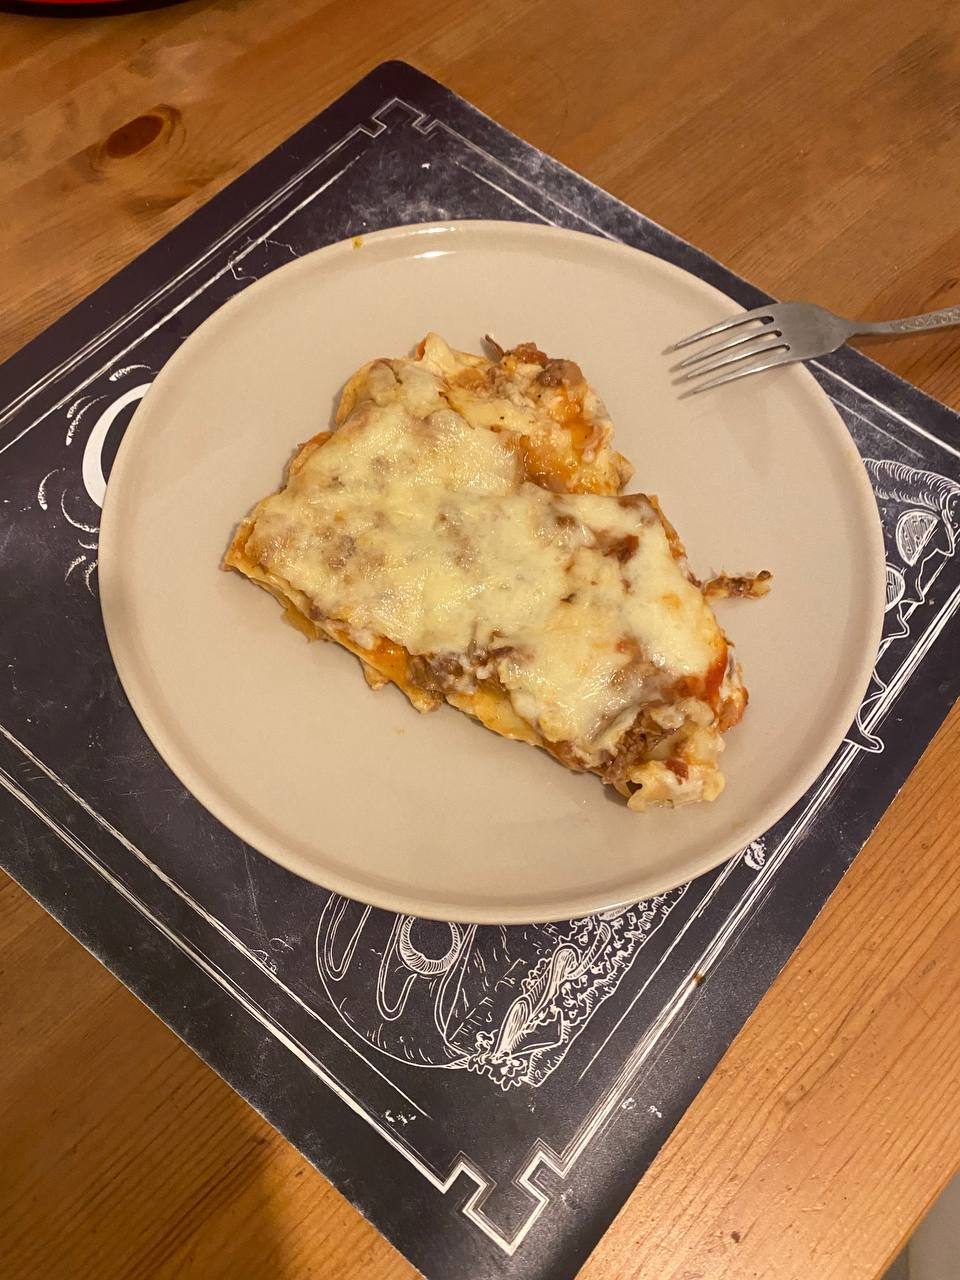

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: